### Problem Statement

Why are our best and most experienced employees leaving prematurely? Use this database and try to predict which valuable employees will leave next. Fields in the dataset include:

satisfaction_level: satisfaction rating on scale of 0 to 1

last_evaluation: Evaluation rating on scale of 0 to 1

number_project: Number of projects employee is involved with

average_montly_hours: Average monthly hrs clocked in last quarte

time_spend_company: Time spent in the company ( in years)

Work_accident: Work Accident flag

left: Whether that employee has quit or not ( 1= Yes , 0 = No). This is the target variable

promotion_last_5years: Whether the employee was promoted in last 5 years (1=Yes, 0=No)

sales: Which sales category was his role in, the category sales represents generic sales profile

salary: Category of the salary

#### Import necessary libraries

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

#### Load the datasets

In [23]:
hr_train = pd.read_csv(r'C:\Users\user\Documents\Work\Edvancer\Python\Project 4 - Employee attrition\hr_train.csv')
hr_test = pd.read_csv(r'C:\Users\user\Documents\Work\Edvancer\Python\Project 4 - Employee attrition\hr_test.csv')

In [24]:
# Display head of training dataset

hr_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In [25]:
# Display head of test dataset

hr_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.10,0.77,6,247,4,0,0,sales,low
3,0.45,0.54,2,135,3,0,0,sales,low
4,0.11,0.81,6,305,4,0,0,sales,low


In [26]:
# Display basic info

print(hr_train.info())
print('------ ----- ----- ----- ----- ----- ----- -----')
print(hr_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10499 non-null  float64
 1   last_evaluation        10499 non-null  float64
 2   number_project         10499 non-null  int64  
 3   average_montly_hours   10499 non-null  int64  
 4   time_spend_company     10499 non-null  int64  
 5   Work_accident          10499 non-null  int64  
 6   left                   10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   sales                  10499 non-null  object 
 9   salary                 10499 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 820.4+ KB
None
------ ----- ----- ----- ----- ----- ----- -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                 Non-Null Count 

##### Basic information are:
- hr_train has 10 columns, 10499 rows, no null value, 2 categorical columns
- hr_test has 9 columns, 4500 rows, no null value, 2 categorical columns

#### Exploratory Data Analysis

In [27]:
# Check class distribution of the target variable
print(hr_train['left'].value_counts(normalize=True))

# Around 29% of employees left the company in the given dataset

left
0    0.707115
1    0.292885
Name: proportion, dtype: float64


In [28]:
# Basic statistics
print(hr_train.describe())

       satisfaction_level  last_evaluation  number_project  \
count        10499.000000     10499.000000    10499.000000   
mean             0.612683         0.717131        3.808553   
std              0.248578         0.171483        1.230572   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          10499.000000        10499.000000   10499.000000  10499.000000   
mean             201.059815            3.494238       0.144299      0.292885   
std               49.959332            1.453227       0.351410      0.455108   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

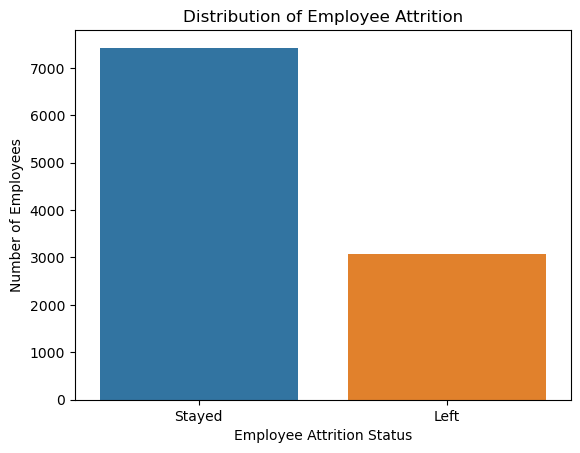

In [29]:
# Distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='left', data=hr_train)
plt.title('Distribution of Employee Attrition')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.xlabel('Employee Attrition Status')  
plt.ylabel('Number of Employees')        
plt.show()

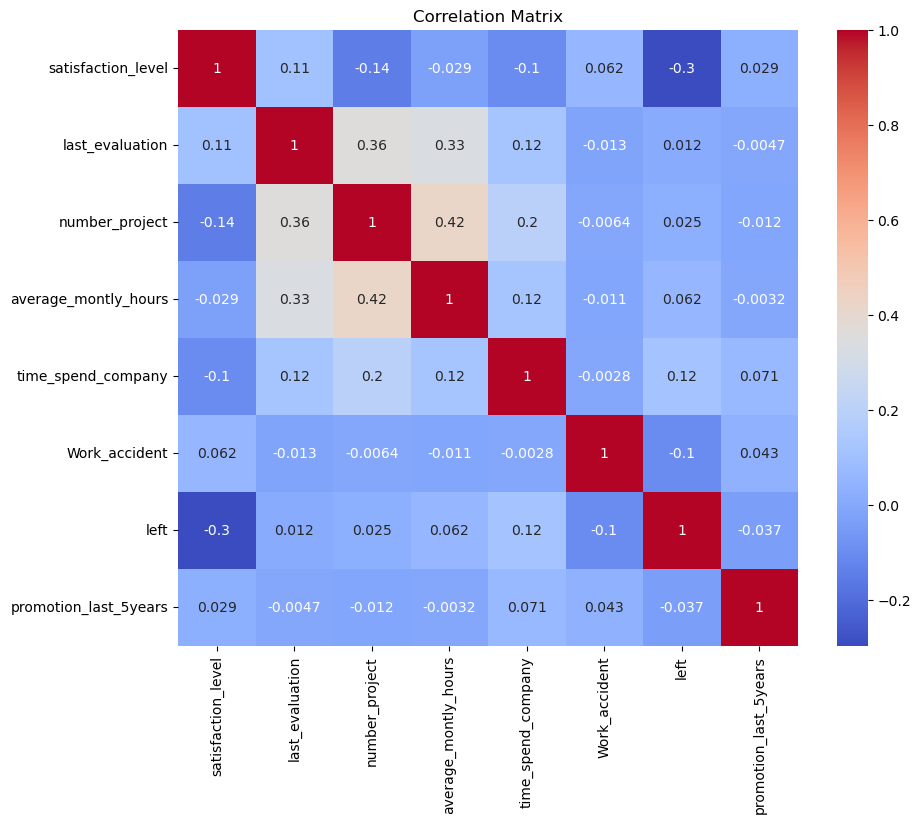

In [30]:
# Correlation matrix for only numeric columns

# Select only numeric columns
numeric_data = hr_train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

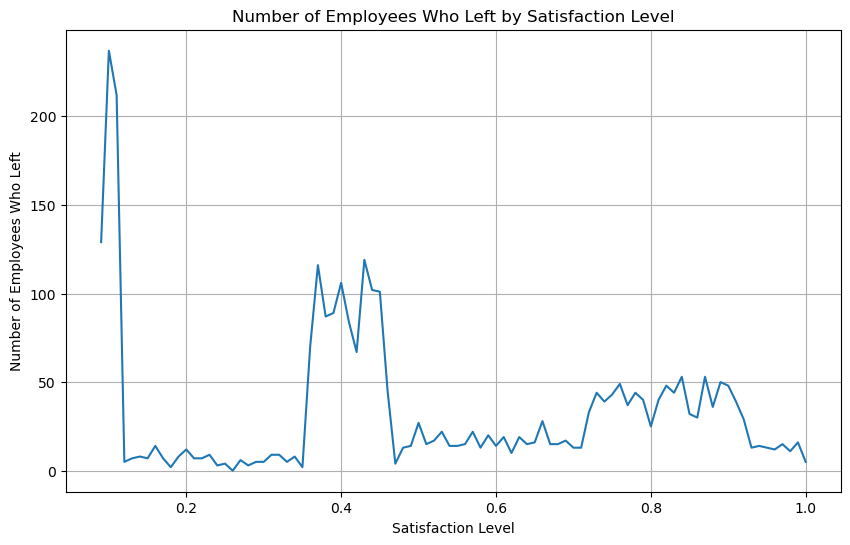

In [31]:
# Linegraph depicting no. of employees who left by satisfaction level

# Group by satisfaction level of employees who left
left_employees_satisfaction = hr_train.groupby('satisfaction_level')['left'].sum()

# Line graph depicting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x=left_employees_satisfaction.index, y=left_employees_satisfaction.values)
plt.title('Number of Employees Who Left by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Employees Who Left')
plt.grid(True)
plt.show()

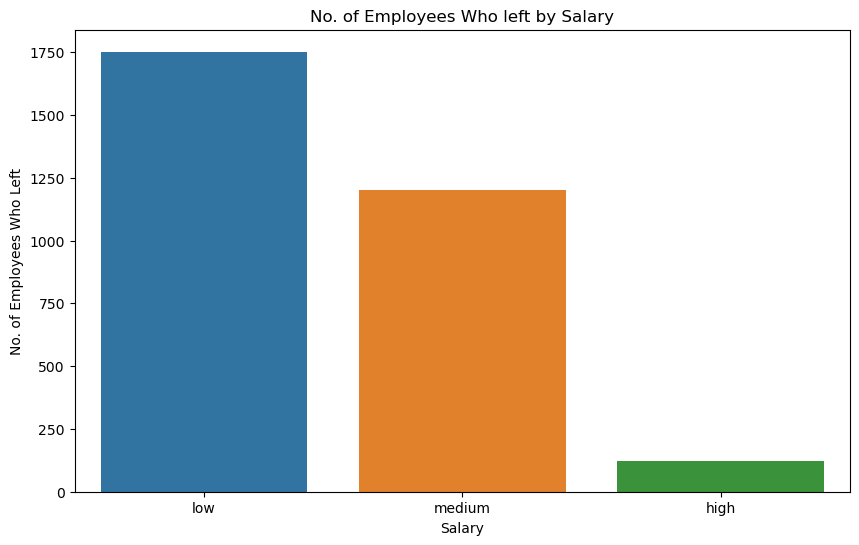

In [32]:
# Bar graph to depict the no. of employees left based on their salary

# Group by salary and number of employees who left
left_employees_salary = hr_train.groupby('salary')['left'].sum()

# Plotting a bar graph to visualise this relationship
plt.figure(figsize=(10,6))
sns.barplot(x=left_employees_salary.index, y=left_employees_salary.values, order=['low', 'medium', 'high'])
plt.title('No. of Employees Who left by Salary')
plt.xlabel('Salary')
plt.ylabel('No. of Employees Who Left')
plt.show()

#### Data Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder_sales = LabelEncoder()
label_encoder_salary = LabelEncoder()
hr_train['sales'] = label_encoder_sales.fit_transform(hr_train['sales'])
hr_train['salary'] = label_encoder_salary.fit_transform(hr_train['salary'])

hr_test['sales'] = label_encoder_sales.transform(hr_test['sales'])
hr_test['salary'] = label_encoder_salary.transform(hr_test['salary'])

In [34]:
hr_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,7,2
1,0.66,0.77,2,171,2,0,0,0,9,2
2,0.55,0.49,5,240,3,0,0,0,9,0
3,0.22,0.88,4,213,3,1,0,0,9,2
4,0.20,0.72,6,224,4,0,1,0,9,2


In [35]:
hr_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.10,0.77,6,247,4,0,0,7,1
3,0.45,0.54,2,135,3,0,0,7,1
4,0.11,0.81,6,305,4,0,0,7,1


In [36]:
# Separate features and target variable
X = hr_train.drop('left', axis=1)
y = hr_train['left']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(hr_test)

#### Model Selection and Training

###### Model 1: Using Random Forest

In [37]:
# Initialize the Random Forest model
model_RF = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
model_RF.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_proba_RF = model_RF.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc_score_RF = roc_auc_score(y_val, y_val_proba_RF)
print(f'Validation AUC Score: {auc_score_RF:.4f}')

Validation AUC Score: 0.8289


###### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and AUC score
print(f'Best Parameters: {grid_search.best_params_}')
best_model_RF = grid_search.best_estimator_
y_val_proba_tuned = best_model_RF.predict_proba(X_val)[:, 1]
auc_score_tuned = roc_auc_score(y_val, y_val_proba_tuned)
print(f'Tuned Validation AUC Score: {auc_score_tuned:.4f}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Validation AUC Score: 0.8359


###### Model 2: Using XGBoost

In [41]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_model = XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc_score_xgb = roc_auc_score(y_val, y_val_proba_xgb)
print(f'XGBoost Validation AUC Score: {auc_score_xgb:.4f}')

XGBoost Validation AUC Score: 0.8297


##### Model 3: Using an ensemble method

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define individual models
model1 = RandomForestClassifier(random_state=42)
model2 = XGBClassifier(random_state=42)
model3 = LogisticRegression(random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', model1), ('xgb', model2), ('lr', model3)],
    voting='soft'  # Use soft voting for probability scores
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_proba_ensemble = ensemble_model.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc_score_ensemble = roc_auc_score(y_val, y_val_proba_ensemble)
print(f'Ensemble Validation AUC Score: {auc_score_ensemble:.4f}')

Ensemble Validation AUC Score: 0.8348


#### Predicting on test data set using the best_model_rf

In [ ]:
# Predict probabilities for the test data
test_proba = best_model_RF.predict_proba(test_data_scaled)[:, 1]

# Save predictions to a CSV file
output = pd.DataFrame({'left_probability': test_proba})
output.to_csv('predictions.csv', index=False)

#### Interpretation of Results

In [ ]:
# Feature importance
importances = best_model.feature_importances_
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()